# Predicting house prices using Linear Regression

## Agenda

- Read data and handle **missing values**?
- How do I **train** a linear regression model?
- How to deal with **high leverage points**?
- How to deal with **collinearity**?
- How to use **regularization** with a linear regression model?
- What are some **evaluation metrics** for regression problems?

## Reading data using pandas

**Pandas:** popular Python library for data exploration, manipulation, and analysis

In [156]:
# conventional way to import pandas
import pandas as pd

In [157]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('data/houseprices.csv', index_col=0)

# display the first 10 rows
data.head(10)

,MSSubClass,MSZoning,LotFrontage,SalePrice
Id,,,,
1,60,RL,65.0,208500
2,20,RL,80.0,181500
3,60,RL,68.0,223500
4,70,RL,60.0,140000
5,60,RL,84.0,250000
6,50,RL,85.0,143000
7,20,RL,75.0,307000
8,60,RL,NaN,200000
9,50,RM,51.0,129900


In [159]:
# check the shape of the DataFrame (rows, columns)
data.shape

(1460, 4)

What are the features?
- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification
- **LotFrontage**: Linear feet of street connected to property

What is the response?
- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 1460 **observations** (represented by the rows).

Filling **missing values** with the mean of the columns

In [160]:
data = data.fillna(data.mean())
data.head(10)

,MSSubClass,MSZoning,LotFrontage,SalePrice
Id,,,,
1,60,RL,65.000000,208500
2,20,RL,80.000000,181500
3,60,RL,68.000000,223500
4,70,RL,60.000000,140000
5,60,RL,84.000000,250000
6,50,RL,85.000000,143000
7,20,RL,75.000000,307000
8,60,RL,70.049958,200000
9,50,RM,51.000000,129900


## Dealing with categorical features

**MSZoning** is a categorical feature and linear regression only accepts numerical data

In [161]:
data.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [162]:
mszoning_dummies = pd.get_dummies(data.MSZoning, prefix='MSZoning')

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, mszoning_dummies], axis=1)

data.head(10)

,MSSubClass,MSZoning,LotFrontage,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
Id,,,,,,,,,
1,60,RL,65.000000,208500,0,0,0,1,0
2,20,RL,80.000000,181500,0,0,0,1,0
3,60,RL,68.000000,223500,0,0,0,1,0
4,70,RL,60.000000,140000,0,0,0,1,0
5,60,RL,84.000000,250000,0,0,0,1,0
6,50,RL,85.000000,143000,0,0,0,1,0
7,20,RL,75.000000,307000,0,0,0,1,0
8,60,RL,70.049958,200000,0,0,0,1,0
9,50,RM,51.000000,129900,0,0,0,0,1


## Preparing X and y using pandas

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [163]:
# create a Python list of feature names
feature_cols = ['MSSubClass','LotFrontage', 'MSZoning_C (all)','MSZoning_FV','MSZoning_RH','MSZoning_RL','MSZoning_RM']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# print the first 5 rows
X.head()

,MSSubClass,LotFrontage,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
Id,,,,,,,
1,60,65.0,0,0,0,1,0
2,20,80.0,0,0,0,1,0
3,60,68.0,0,0,0,1,0
4,70,60.0,0,0,0,1,0
5,60,84.0,0,0,0,1,0


In [164]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(1460, 7)


In [165]:
# select a Series from the DataFrame
y = data['SalePrice']

In [166]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1460,)


## Splitting X and y into training and testing sets

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [168]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1095, 7)
(1095,)
(365, 7)
(365,)


## Linear regression in scikit-learn

In [169]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [170]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('MSSubClass', 102.83847109091691),
 ('LotFrontage', 867.0950124084828),
 ('MSZoning_C (all)', -76102.9726825381),
 ('MSZoning_FV', 59326.52276493221),
 ('MSZoning_RH', -4404.183198188249),
 ('MSZoning_RL', 36225.81287809168),
 ('MSZoning_RM', -15045.179762297525)]

### Making predictions

In [171]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

We need an **evaluation metric** in order to compare our predictions with the actual values!

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [172]:
# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))

51255.177460350875


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [173]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_pred))

5137542894.214769


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [174]:
# calculate RMSE by hand
import numpy as np

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

71676.65515504172


## Regularized Linear Regression

Let's try out Lasso and Ridge regularization

**Lasso**: $$\min_{\textbf{w}} l(\textbf{w}) = \frac{1}{2} ||\textbf{X}\textbf{w} - \textbf{y}||^2 + \alpha ||\textbf{w}||_1$$

**Ridge**: $$\min_{\textbf{w}} l(\textbf{w}) = \frac{1}{2} ||\textbf{X}\textbf{w} - \textbf{y}||^2 + \alpha ||\textbf{w}||^2_2$$

In [175]:
from sklearn.linear_model import Lasso

# instantiate
linreg = Lasso(alpha = 1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

71677.09229917469


In [176]:
from sklearn.linear_model import Ridge

# instantiate
linreg = Ridge(alpha = 1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

71717.9730076717


## Dealing with collinearity

Let add a bogus feature named **'Mix'** to our data that linearly combines MSSubClass and LotFrontage

In [177]:
data['Mix'] = 2*data['MSSubClass'] + data['LotFrontage']

feature_cols = ['Mix','MSSubClass','LotFrontage', 'MSZoning_C (all)','MSZoning_FV','MSZoning_RH','MSZoning_RL','MSZoning_RM']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# print the first 5 rows
X.head()

,Mix,MSSubClass,LotFrontage,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
Id,,,,,,,,
1,185.0,60,65.0,0,0,0,1,0
2,120.0,20,80.0,0,0,0,1,0
3,188.0,60,68.0,0,0,0,1,0
4,200.0,70,60.0,0,0,0,1,0
5,204.0,60,84.0,0,0,0,1,0


One way to deal with collinearity is using **Variance Inflation Factor (VIF)**

$$VIF(\hat w_j) = \frac{1}{1 - R^2_{x_j | x_{-j}}},   R^2 = \frac{TSS - RSS}{TSS}$$

where $RSS = \sum_i(y_i - \hat y_i)^2$ and $TSS = \sum_i(y_i - \bar y)^2$

In [178]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X.values

vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print(vif)

[inf, inf, inf, 1.1179332654084944, 1.842898727673072, 1.1903503375595323, 15.199712096484024, 3.330707015230975]


/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


The first 3 features are perfectly collinear. Let's remove one of those three collinear feature, e.g. **MSSubClass**, and compute the VIF again

In [179]:
feature_cols = ['Mix','LotFrontage', 'MSZoning_C (all)','MSZoning_FV','MSZoning_RH','MSZoning_RL','MSZoning_RM']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

X = X.values

vif = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print(vif)

[1.0870985330689937, 1.1268244883995462, 1.1179332654084944, 1.842898727673072, 1.1903503375595326, 15.199712096484024, 3.330707015230975]


Remove collinearity!!!

## Dealing with high leverage points
Let's find all the high leverage points in the dataset using **leverage statistic (hat values)**

Hat value for observation $k$: $h_k = \sum_i \textbf{H}^2_{ik}$ where $\textbf{H}$ is called hat matrix and computed as $\textbf{H} = \textbf{X}(\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T$.

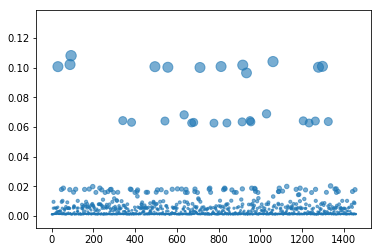

In [180]:
hat_m = X.dot(np.linalg.inv(X.T.dot(X)).dot(X.T))
hat_v = np.sum(hat_m ** 2, 0)

import matplotlib.pyplot as plt

plt.scatter(range(len(hat_v)), hat_v, s=1000*hat_v, alpha=0.6)

**Rule of thumb**: Remove observations with hat values exceeding 2 times the average hat value

In [181]:
# find observations whose hat values exceed 2 times the average
vindex = np.where(hat_v > 2*np.mean(hat_v))
print(vindex[0])

data.drop(vindex[0], inplace = True)
X = data[feature_cols]

[  30   47   52   56   87   88   93  105  115  125  158  165  180  197
  212  231  240  246  256  270  281  285  297  300  312  313  317  335
  341  377  381  383  399  409  411  412  453  460  495  501  507  525
  535  543  549  557  578  603  623  635  637  641  644  650  671  681
  686  687  699  703  705  711  755  758  762  778  807  812  824  829
  831  840  861  864  875  885  909  913  914  916  934  951  955  959
  969  973  975  977  985  989  991 1030 1061 1062 1087 1089 1091 1107
 1127 1172 1182 1186 1190 1191 1206 1211 1217 1234 1246 1264 1265 1266
 1279 1298 1317 1326 1337 1358 1364 1365 1374 1393 1416 1442 1454]
